In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing import image

In [43]:
data_dir = 'Downloads/food-101-001/food-101/images'
data = tf.keras.preprocessing.image_dataset_from_directory(data_dir)

Found 41141 files belonging to 41 classes.


In [44]:
datagen = ImageDataGenerator(
 rescale = 1./255,
 validation_split = 0.2)

In [45]:
train_generator = datagen.flow_from_directory(
    data_dir,
    target_size=(224, 224), 
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

validation_generator = datagen.flow_from_directory(
    data_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)


Found 32914 images belonging to 41 classes.
Found 8227 images belonging to 41 classes.


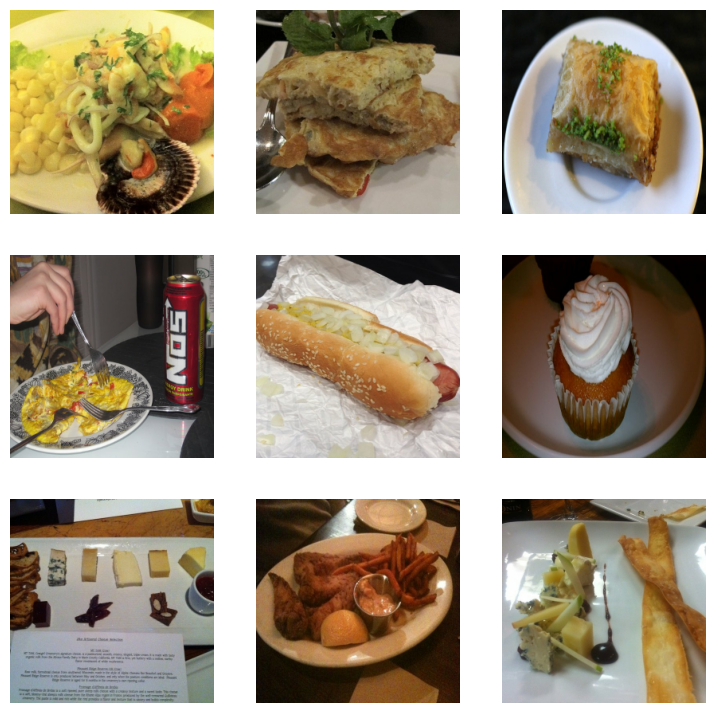

In [26]:
def show_img(data):
    plt.figure(figsize=(9,9))
    for images, labels in data.take(1):
        for i in range(9):
            ax = plt.subplot(3, 3, i + 1)
            ax.imshow(images[i].numpy().astype("uint8"))
            ax.axis("off")
show_img(data)


In [46]:
from tensorflow.keras.applications import ResNet50
feature_extractor = ResNet50(weights='imagenet', 
                             input_shape=(224, 224, 3),
                             include_top=False)
feature_extractor.trainable = False
input_ = tf.keras.Input(shape=(224, 224, 3))
x = feature_extractor(input_, training=False)
x = tf.keras.layers.GlobalAveragePooling2D()(x)
output_ = tf.keras.layers.Dense(1, activation='sigmoid')(x)
model = tf.keras.Model(input_, output_)
model.compile(optimizer='adam',
             loss='binary_crossentropy',
             metrics=['accuracy'])
model.summary()

Model: "model_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_9 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 global_average_pooling2d_2  (None, 2048)              0         
  (GlobalAveragePooling2D)                                       
                                                                 
 dense_12 (Dense)            (None, 1)                 2049      
                                                                 
Total params: 23589761 (89.99 MB)
Trainable params: 2049 (8.00 KB)
Non-trainable params: 23587712 (89.98 MB)
_________________________________________________________________


In [48]:
model.fit(train_generator, epochs=2, validation_data=validation_generator)

Epoch 1/2
   4/1029 [..............................] - ETA: 37:40 - loss: 0.4257 - accuracy: 0.9756

KeyboardInterrupt: 

In [ ]:
model.save('./resnet50_food_model')

Prediction 

In [ ]:
num_classes = len(data.class_names

def predict_image(filename, model):
 img_ = image.load_img(filename, target_size=(228, 228))
 img_array = image.img_to_array(img_)
 img_processed = np.expand_dims(img_array, axis=0)
 img_processed /= 255.
 prediction = model.predict(img_processed)
 index = np.argmax(prediction)
 plt.title("Object Detected As - {}".format(str(classes[index]).title())
 plt.imshow(img_array)